# Data Exploration
## Background

From the _List of Billboard number-one singles_ Wikipedia [page](https://en.wikipedia.org/wiki/List_of_Billboard_number-one_singles): 
>The following year-by-year, week-by-week listings are based on statistics accrued by Billboard magazine before and after the inception of its Hot 100 popularity chart in August 1958.
All data is pooled from record purchases and radio/jukebox play within the United States. Later charts also include digital single sales, online streaming, and YouTube hits.

### How Does a song become number one?
From Spliter in 2015: 
1. __The song has to be good (and accessible):__ 
<blockquote>
The first step to snagging a number one song is, well, writing and producing a really good song...Making a "good" number one song is not necessarily the same as making a "good" song in general. It's not about artistry (though sometimes artistry does hit number one). It's about popularity. And not long-term popularity. But popularity right here, right now.
</blockquote>  

2. __Every week counts independently__:
<blockquote>  
<p>The Billboard Hot 100 chart is calculated on a weekly basis. For a long time, the Billboard charts counted from Monday to Sunday as a standard week. But starting in July 2015, when new music began to standardly come out on Fridays, Billboard has been tracking a single week from Friday to Thursday. At the end of the week, your numbers reset. (And we find out what the number one song is every Tuesday. Are you keeping up?) So there's a huge benefit to releasing song or album on the standard release day (Friday); it helps to take advantage of the way the system counts sales. Release day matters a lot, for the Hot 200 albums chart as well, not just for singles.</p>
    
    <p>To be clear, this doesn't mean that your only chance to have a number one single is immediately after it comes out. Some songs peak much later. We call those "sleeper hits"—songs like Iggy Azalea's "Fancy," for example. A song can peak because of a really great music video, or its inclusion in something else popular (like a movie trailer). For example, N.W.A. finally snagged their first top 40 hit in the wake of the release of the movie Straight Outta Compton almost 30 years after its release.</p>

    But every week on Friday, the counter clocks reset, and a song has to prove itself the best in the country all over again.
</blockquote>

3. __The first factor in number one calculations: sales__:
<blockquote>  
<p>The number of albums sold is determined by Nielsen Soundscan, a service that monitors how many albums an artist sells both digitally and physically. According to Nielsen's site, the organization compiles data from more than 39,000 retail outlets globally every week, and then reports the findings to Billboard to use in a specially concocted ratio to pick the Top 100.</p>
    
    <p>In the calculations for number one, sales only play a small role. According to Billboard, sales make up somewhere between 35-45% of the ratio that determines how well a song does on the charts. But if a single has massive sale numbers, that alone could bump it into the Top 40.</p>
    
    <p>In February 2005, Billboard began to include digital sales of albums from digital retailers like iTunes and Rhapsody. In 2007, the system evolved to include streaming songs from platforms like Yahoo Music and AOL Music. Since then, the charts have been brought up to date by including platforms like Spotify and Apple Music, in addition to views from YouTube—with one video play counting as a song play. Ultimately, though, streaming only makes up a small fraction (20-30%) of the formula used to determine the ranking of songs in America.</p>
</blockquote>

4. __What matters more than streaming? Radio__:
<blockquote>  
<p>It's tempting to discount radio as something that only olds listen to. Who doesn't just make Spotify playlists or listen to the "radio" on Pandora—one that's specifically curated for them? Turns out, almost everyone. Radio has, for decades, been the most stable part of the music industry in terms of maintaining listeners.</p>
    
    <p>According to a 2013 Pew Research Center report on audio listening in the US, almost 92% of the listening public listens to AM/FM radio. That percentage hasn't changed much over the last 10 years, even with the advent of the internet. The biggest AM/FM radio company in America, iHeart Radio, says people tune in to the radio eight times per day. According to the Pew Research Center, people spend more time listening to the radio than they do surfing the internet. And radio plays take care of the rest of the counting ratio with 30-40%.</p>
    
Getting into the Top 40 might take luck, but getting the number one song in America takes more than that—it takes a precise confluence of every form of viral behavior all at once. People have to buy the song, they have to hear it on the radio and watch the video on YouTube. It has to, simply, be a hit.
</blockquote>





[Source](https://en.wikipedia.org/wiki/List_of_Billboard_number-one_singles)   



## Goals
Explore the data, answer preliminary questions.

### Preliminary Questions

1. Of all songs that went number one since 1950, are there any commonalities between the songs? Like tempo, valence, etc. ?
2. Is there any cyclical patterns? For example, popular songs today sound very disco-like from the 70s and very synth-like from the 80s. 

3. Are genres consistent among number ones? Do all songs have similar genres?
4. Are songs that go number one sung more by women or men? Solo acts or ensembles/groups?

These questions are just a starting point to guide this analysis. I'll describe further questions as I go.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
%matplotlib inline

songs = pd.read_csv("../data/processed/final_dataset_year.csv", index_col=0)
songs.shape

(1188, 20)

A question that came to mind was which decade had the most number one hits?

### Which decade had the most number one hits?

In [2]:
songs['decade'].value_counts()

1970    253
1980    231
1960    203
1990    140
2000    129
2010    116
1950    116
Name: decade, dtype: int64

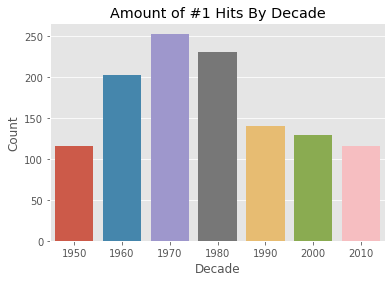

In [3]:
sns.countplot(x = 'decade', data=songs)

plt.xlabel('Decade')
plt.ylabel('Count')
plt.title("Amount of #1 Hits By Decade")
plt.show()

It looks like the 1970s had the most number one hits, but the 80s and the 60s are not too far behind. Interestingly, the most recent decade, the 2010s, has the least number one hits, tied with th 1950s.

From the histogram, we see that the amount of number one's per decade actually decrease after the 80s.

### NME: The number of unique Number One singles is decreasing.
<blockquote>In the ‘70s, the average number of Number Ones could be as high as 30 per year.In the past four years we haven’t had more than 13 unique Number Ones per year. As BBC Radio 1 boss Chris Price explained to NME last year, the stagnancy of the chart is probably down to streaming being counted in the charts:
    
“We’ve moved away from somebody walking into HMV and being a physical single, or downloading a 99p download from iTunes, and we’re moving much more towards measuring engagement over time. It’s less like somebody walking into a shop and making a purchase, and more like somebody sitting at home in their bedroom and listening to something several times over.”

[Source](https://www.nme.com/blogs/nme-blogs/billboard-100-shorter-explicit-2054269)  
</blockquote>

I'm curious to see if we can pinpoint a specific year for this drop in number one hits.

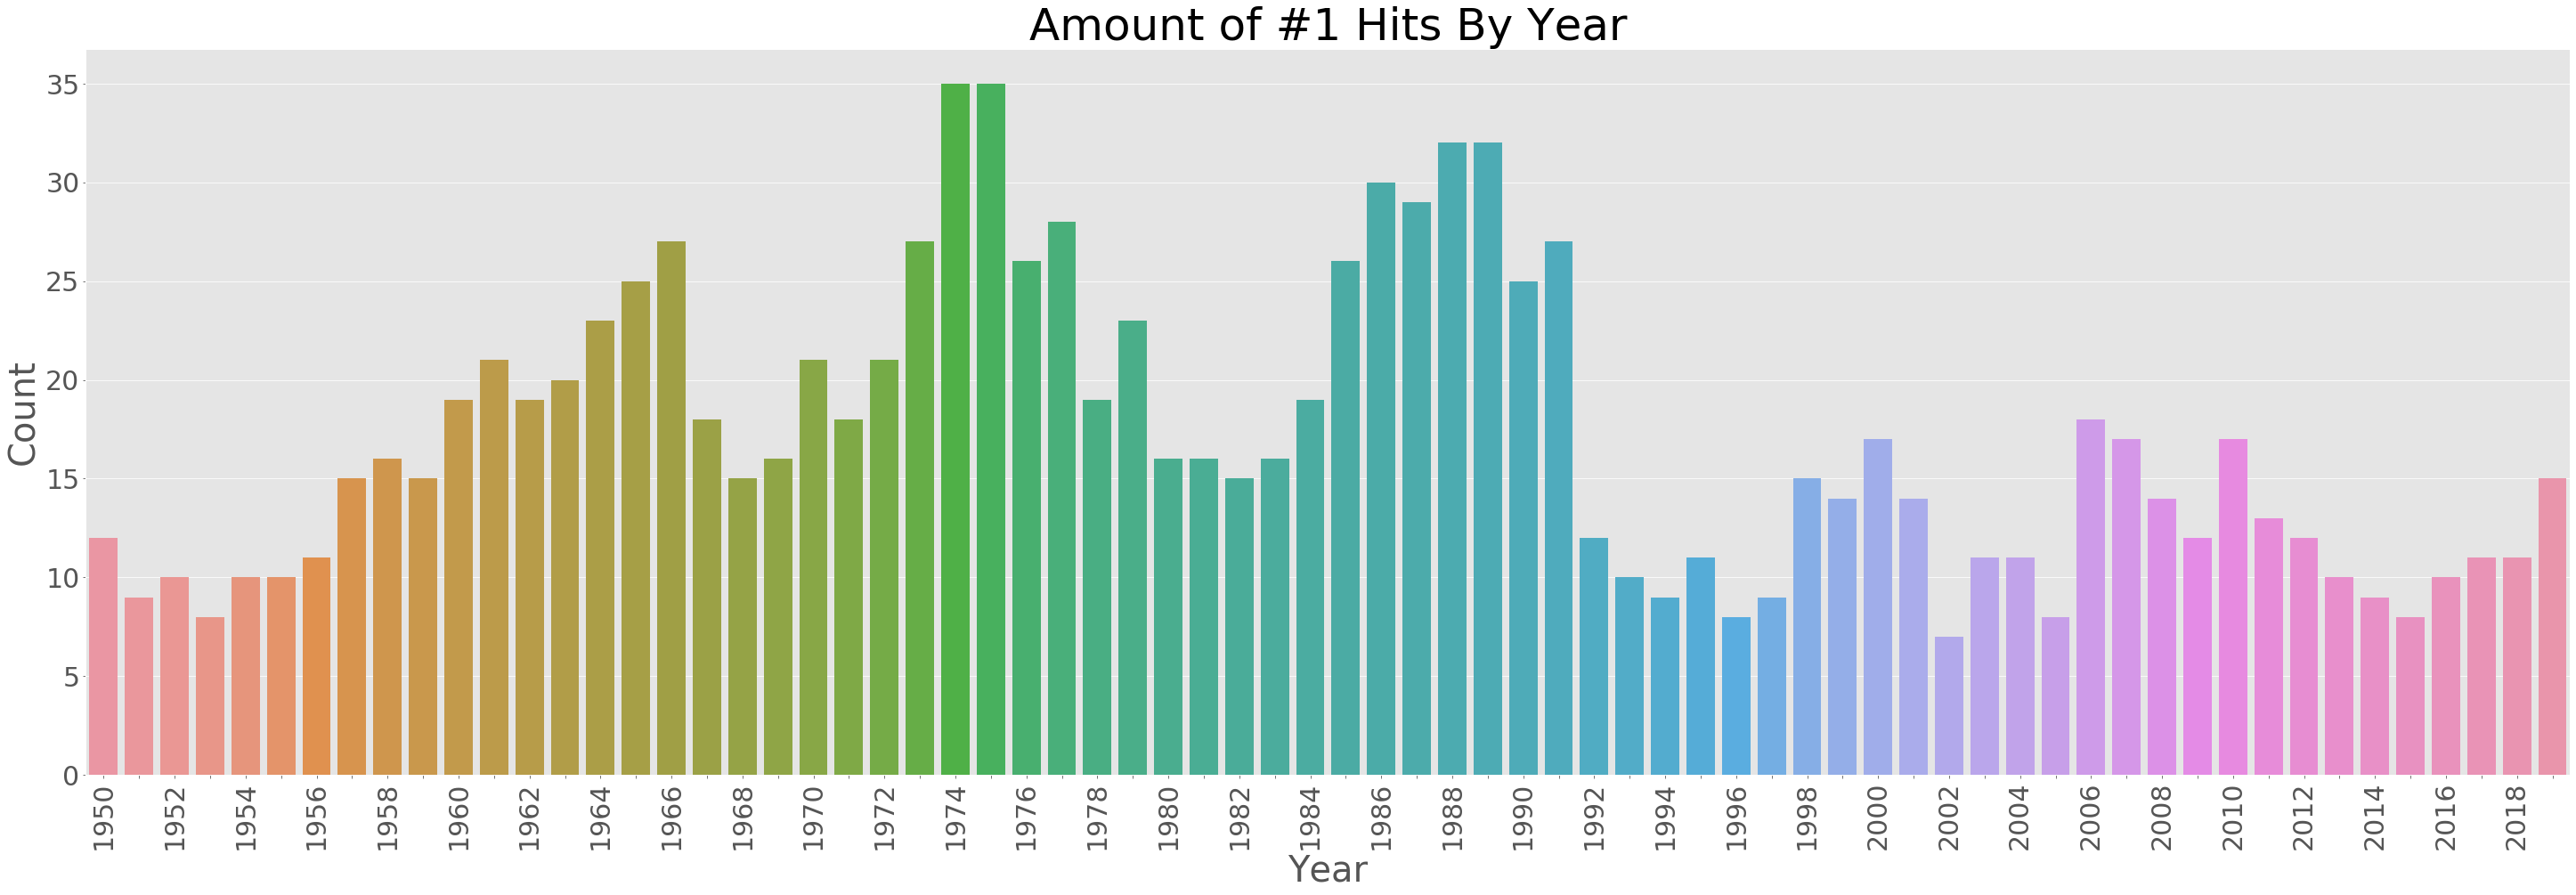

In [4]:
fig, ax = plt.subplots(figsize=(50,15))
sns.countplot(x='year', data=songs)

e = 2
for n,label in enumerate(ax.xaxis.get_ticklabels()):
    if n%e !=0:
        label.set_visible(False)

plt.xlabel('Year', fontsize=40)
plt.ylabel('Count', fontsize=40)
plt.xticks(rotation=90, fontsize=30)
plt.yticks(fontsize=30)
plt.title("Amount of #1 Hits By Year", fontsize=50)
plt.show()

This is actually very interesting! We see 3 major peaks in the amount of number ones per year. The first peak in the mid 60s, the mid 70s, and a persistent peak that started in the mid 80s and lasted through the early 90s. There are some smaller peaks from 1998-2001 and 2006-2010. After 2010, we can see a return to early 1950s numbers.

### Who has had the most number one hits since 1950?

I'll look at the top 10 acts with the most number one hits. I'll refer to these acts as __top hit makers__ from here on out.

In [9]:
songs['artist_name'].value_counts()[:10]

The Beatles        20
Mariah Carey       19
Elvis Presley      17
Michael Jackson    12
Madonna            12
Rihanna            11
Whitney Houston    11
The Supremes       10
Janet Jackson      10
Bee Gees            9
Name: artist_name, dtype: int64

The Beatles have had the most number one hits, while Mariah Carey trails them by just one song, and Elvis by 3. A quick Google search verifies this finding.

Looking closer at these __top hit makers__, 60% of them are female and 40% are male. Three of these acts are groups/ensembles, the rest are solo acts.

Off the top of my head, I know The Beatles were active in the 60s but broke up in the 70s. Another quick search tells me that The Beatles were actually together for 8 years. Mariah Carey has been making music since the 90s. I want to take a closer look at this.

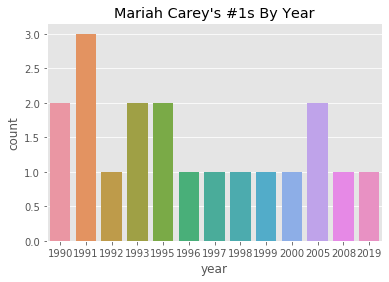

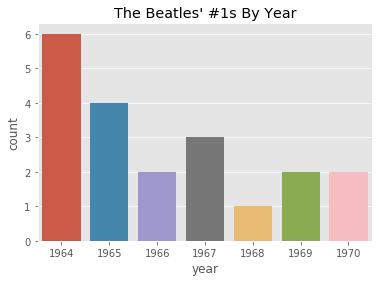

In [22]:
# Mariah Carey's data
sns.countplot(songs[songs['artist_name'] == "Mariah Carey"]['year'])
plt.title("Mariah Carey's #1s By Year")
plt.show()

# The Beatles' data
sns.countplot(songs[songs['artist_name'] == "The Beatles"]['year'])
plt.title("The Beatles' #1s By Year")
plt.show()

The above plot shows that The Beatles have had at least one hit from 1964-70 (in the US). This means that, theoretically, it has taken Mariah Carey an extra decade to come close to The Beatles' record as __top hit maker__, given that we ignore other factors that may be at play as seen in _Amount of #1 Hits By Year_ plot.

I wonder how long the careers of the other __top hit makers__ has contributed to the number of hits they made.

### How long has each Top Hit Maker's career been? How many decades do their hits span?

In [16]:
top_10_artists = list(songs['artist_name'].value_counts()[:10].index)

for artist in top_10_artists:
    num_hits = len(songs[songs['artist_name'] == artist])
    decades = songs[songs['artist_name'] == artist]['decade'].unique()
    l = len(decades)
    
    print(f"{artist} had {num_hits} number ones throughout {l} decade(s), including: {decades} \n")

The Beatles had 20 number ones throughout 2 decade(s), including: [1960 1970] 

Mariah Carey had 19 number ones throughout 3 decade(s), including: [1990 2000 2010] 

Elvis Presley had 17 number ones throughout 2 decade(s), including: [1950 1960] 

Michael Jackson had 12 number ones throughout 3 decade(s), including: [1970 1980 1990] 

Madonna had 12 number ones throughout 3 decade(s), including: [1980 1990 2000] 

Rihanna had 11 number ones throughout 2 decade(s), including: [2000 2010] 

Whitney Houston had 11 number ones throughout 2 decade(s), including: [1980 1990] 

The Supremes had 10 number ones throughout 1 decade(s), including: [1960] 

Janet Jackson had 10 number ones throughout 3 decade(s), including: [1980 1990 2000] 

Bee Gees had 9 number ones throughout 1 decade(s), including: [1970] 



The average __top hit maker__ has a career that spans at least two decades. However, this is not to say that each __top hit maker__ has a career of 20 years. I'll show Rihanna as an example.

In [30]:
for i,row in songs[songs['artist_name'] == "Rihanna"].iterrows():
    print(row['track_name'],":",row['year'])

SOS : 2006
Umbrella : 2007
Take A Bow : 2008
Disturbia : 2008
Rude Boy : 2010
What's My Name? : 2010
Only Girl (In The World) : 2010
S&M : 2011
We Found Love : 2011
Diamonds - The Bimbo Jones Vocal Edit : 2012
Work : 2016
